El juego de la vida
---------------------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
def exten(mat):
    n = len(mat)
    ex  = np.zeros((n+2,n+2))
    ex[1:n+1,1:n+1] = mat
    return ex 

In [4]:
def sumavecinos(i,j, ex):
    return (ex[i,j-1] + ex[i,j+1] + ex[i-1,j-1] + 
            (ex[i-1,j] + ex[i-1,j+1] + ex[i+1,j-1]) + 
            (ex[i+1,j]+ ex[i+1,j+1]))

In [5]:
def reglas(mat):
    n = len(mat)
    ex  = exten(mat)
    nmat = np.zeros((n,n))
    for i in range(1,n+1):
        for j in range(1,n+1):
            s = sumavecinos(i,j,ex)
            if  s>3 or s <=1: 
                nmat[i-1,j-1] = 0
            if s == 3 and mat[i-1,j-1]== 0: 
                nmat[i-1,j-1] = 1
            if (s == 3 or s== 2) and mat[i-1,j-1]== 1: 
                nmat[i-1,j-1] = 1
    return nmat  

Algunas configuraciones iniciales. Por ejemplo, ajz es un tablero de ajedrez

In [6]:
init = np.zeros((4,4))
init[1,1] = 1
init[1,2] = 1
init[2,1] = 1
 

In [20]:
ajz = np.zeros((8,8))
for i in range(8):
    for j in range(8):
        ajz[i,j]=  (i+j)%2

Evolución del juego
--------------------

La evolución del estado inicial  $n$ unidades de tiempo después está dada por el resultado de evolucion(n, init) en donde
1. n es un numero entero
2. init es la matriz del estado inicial

In [7]:
def evolucion(n,ini):
    historia = []
    historia.append(ini)
    g = ini 
    for i in range(n):
        g = reglas(g)
        historia.append(g)
    return historia

Representación gráfica de las cuadrículas
------------------------------------------

La representación gráfica de cualquier cuadrícula (configuración) se puede hacer con la instrucción imshow de la biblioteca gráfica matplotlib. 

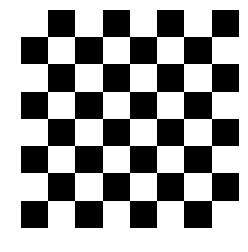

In [22]:
ev = evolucion(10, ajz)  
plt.imshow(ev[0], cmap='binary', interpolation='nearest')
plt.axis('off')
plt.show()

Si imshow no le agrada, se tiene este desarrollo adhoc para mostrar cuadríaculas en blanco y negro de una matriz $n\times n$ de cros y unos. La funcición const_bn construye el andamio Python de los cuadros en blanco y negro. La función muestre los muestra graficamente. 

In [8]:
 def const_bn(mt):
    n = len(mt)
    dx = 1/n
    pieces = []
    frame = patches.Rectangle(
        (0.0, 0.0),1, 1, fill=False, edgecolor="red",linewidth=2) 
    pieces.append(frame)
    for i in range(n):
        for j in range(n):
            if mt[i,j]==1:
                p = patches.Rectangle(
                    (i/n,j/n), dx,dx, edgecolor="red", facecolor="black", fill=True,linewidth=2 )
                pieces.append(p)
            if mt[i,j]==0:
                p = patches.Rectangle(
                    (i/n,j/n), dx,dx, edgecolor="red", fill=False,linewidth=2)
                pieces.append(p)
    return pieces

In [9]:
def muestre_bn(x):
    ax1=plt.subplot(111,aspect='equal')
    shape = const_bn(x)
    for p in shape: ax1.add_patch(p)
    plt.axis('off')
    plt.show() 

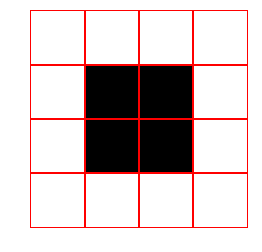

In [12]:
ev = evolucion(10, init) 
muestre_bn(ev[1])

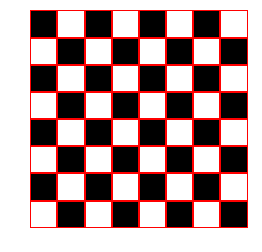

In [42]:
muestre_bn(ajz)